<b><h1>K Nearest Neighbour </h1></b>
<ul>
<li>Supervised Learning Technique </li>
<li>Non Parametric </li>
<li>Hyperparameter = K ( # of neighbours )</li>
<li> Lazy Learner </li>
<li> Effective only when distance metrics reflects similarity between data points</li>
<li> Feature Scalling should be done </li>
</ul>

<h2> Distance Metrics </h2>
<ol>
<li> Minkowski Distance ( L<sub>p</sub> norm )</li>
<ul>
<li> Euclidean : L<sub>2</sub> norm</li>
<li> Manhattan : L<sub>1</sub> norm</li>
</ul>
<li> similarity </li> 
<ul>
<li>Cosine Similarity </li>
<li>Jaccard Similarity </li>
</ul>
<li>Hamming Distance</li>

<h2>ALGORITHM </h2>
<ol>
<li> Take a test data point , calculate its distance between all the train data points </li>
<li> Choose K neighbours </li>
<li> If it is a classification problem return mode of k neighbours .
If it is regression problem return mean / median of K neighbours.</li>

<b><h1>KNN IMPLEMENTATION ON IRIS DATASET</h1></b>

<b><h1>Importing Libraries</h1></b>

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

<b><h1>Loading Datasets</h1></b>

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = df[['petal_length','petal_width','species']]

In [5]:
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   species       150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [7]:
df.describe()

,petal_length,petal_width
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


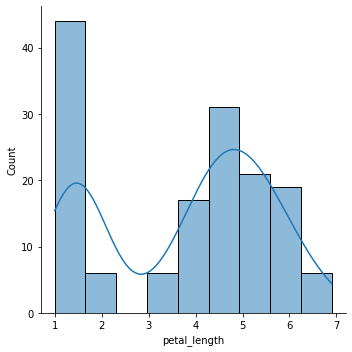

In [9]:
sns.displot(df['petal_length'],kde=True)

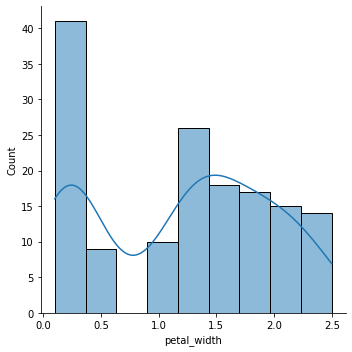

In [10]:
sns.displot(df['petal_width'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


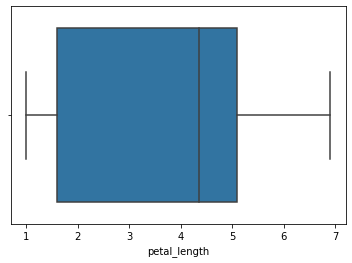

In [11]:
sns.boxplot(df['petal_length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


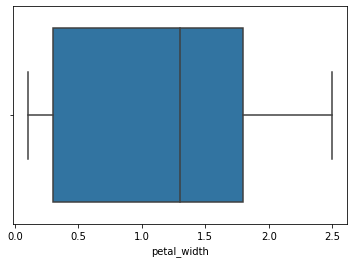

In [13]:
sns.boxplot(df['petal_width'])

INFERENCE : No outliers 

In [14]:
df.isnull().sum()

petal_length    0
petal_width     0
species         0
dtype: int64

INFERENCE : NO MISSING VALUES 

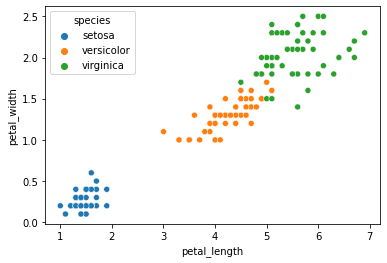

In [15]:
sns.scatterplot(data = df , x = df['petal_length'],y=df['petal_width'],hue = df['species'])

<b>Spliting Dataset into train and test </b>


In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['species']),df['species'],test_size=0.2,random_state=0)

<b>Checking X_train is balanced or imbalanced </b>


In [22]:
Y_train = pd.DataFrame(Y_train)

([<matplotlib.patches.Wedge at 0x7f505dcfa210>,
 [Text(0.4474102822939058, 1.0049000145774145, 'virginica'),
  Text(-1.0815803958179055, -0.20045909154334413, 'setosa'),
  Text(0.6230468493004778, -0.9065388152620647, 'versicolor')])

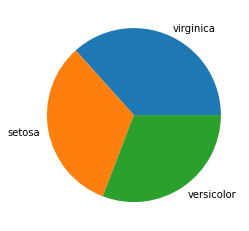

In [23]:
val = Y_train['species'].value_counts().values
label = Y_train['species'].value_counts().index
plt.pie(val,labels = label)

In [24]:
Y_train['species'].value_counts()

virginica     44
setosa        39
versicolor    37
Name: species, dtype: int64

INFERENCE : Dataset is a  balanced dataset 

<b> Normalization </b>
X = (X - Xmin ) / (X_max-X_min)


In [25]:
X_train['petal_length'] = X_train['petal_length'].apply(lambda x : (x-min(X_train['petal_length']))/(max(X_train['petal_length'])-min(X_train['petal_length'])))

In [26]:
X_train['petal_width'] = X_train['petal_width'].apply(lambda x : (x-min(X_train['petal_width']))/(max(X_train['petal_width'])-min(X_train['petal_width'])))

In [ ]:
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

1.Find distance between each test data with all the train data

In [27]:
def eucd(x,y):
  dis = 0 
  for i in range(0,len(x)):
    dis += (x[i]-y[i])**2 
  return round(math.sqrt(dis),4)

def mode(x):
  dic = {}
  for i in x:
    if i not in dic:
      dic[i]=1
    else:
      dic[i]+=1
  
  mx = max(dic.values())
  for i in dic:
    if dic[i]==mx:
      return i

def calc_acc(pred,test1):
  cnt = 0 
  test1 = list(test1)
  pred = list(pred)
  for i in range(len(pred)):
    if pred[i]==test1[i]:
      cnt += 1
  return cnt/len(pred)


In [ ]:
import numpy as np
X_train = np.array(X_train)

In [39]:
#Y_train = Y_train.to_numpy()
X_train = X_train.to_numpy()
#Y_test = Y_test.to_numpy()
X_test = X_test.to_numpy()

In [40]:
X_train[8]

array([0.53448276, 0.58333333])

In [57]:
accuracy_train = {}
for k in range(1,len(X_train)):
  Y_pred = []
  for i in range(0,len(X_train)):
    #1.calc dist 
    #2.find k nearest neighbour 
    #3.Find the mode class 
    dist = {}
    for j in range(0,len(X_train)):
      dist[str(j)+str(i)+"_"+str(Y_train[j][0])] = eucd(X_train[i],X_train[j])
      
    #print(dist)
    dist = sorted(dist.items(), key=lambda kv:kv[1])
    #print(dist)
    nn = []
    for i in dist[:k]:
      nn.append(i[0])
    #print(nn)
    knn = []
    for r in nn:
      knn.append(r.split("_")[-1])
    #print(knn)
    Y_pred.append(mode(knn))
  acc = calc_acc(Y_pred,Y_train)
  accuracy_train[k] = acc

In [56]:
str(Y_train[0][0])

'virginica'

In [58]:
accuracy_test = {}
for k in range(1,len(X_train)):
  Y_pred = []
  for i in range(0,len(X_test)):
    #1.calc dist 
    #2.find k nearest neighbour 
    #3.Find the mode class 
    dist = {}
    for j in range(0,len(X_train)):
      dist[str(j)+str(i)+"_"+str(Y_train[j][0])] = eucd(X_train[i],X_train[j])
      #print(j)
    #print(dist)
    dist = sorted(dist.items(), key=lambda kv:kv[1])
    #print(dist)
    nn = []
    for i in dist[:k]:
      nn.append(i[0])
    #print(nn)
    knn = []
    for r in nn:
      knn.append(r.split("_")[-1])
    #print(knn)
    Y_pred.append(mode(knn))
  acc = calc_acc(Y_pred,Y_test)
  accuracy_test[k] = acc

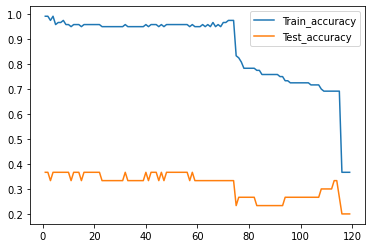

In [61]:
plt.plot(list(accuracy_train.keys()),list(accuracy_train.values()),label='Train_accuracy')
plt.plot(list(accuracy_test.keys()),list(accuracy_test.values()),label='Test_accuracy')
plt.legend()

In [ ]:
accuracy_train

In [ ]:
accuracy_test

Using Sklearn

In [72]:
neigh = KNeighborsClassifier(n_neighbors=60)
neigh.fit(X_train,Y_train)
pred = neigh.predict(X_test)
cm = confusion_matrix(Y_test,pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
